In [1]:
from run_twitter import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

In [3]:
ops_all = np.array(pd.read_csv(f'./Twitter/vax_ops.txt', sep=' ', header=None))/10

In [ ]:
multi_trainL = []
l2_trainL = []
multi_testL = []
l2_testL = []
lboth_trainL = []
l1_trainL = []
lboth_testL = []
l1_testL = []
lbds = []
for start_point in range(0,400,50):
    print("start time stamp:", start_point)
    train_l_multi, test_l_multi, lambda_multi = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'multi', 
                                                               start_pos=start_point, T_train=100)
    train_l_l2, test_l_l2, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l2', 
                                                         start_pos=start_point, T_train=100)
    train_l_lboth, test_l_lboth, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'lboth', 
                                                               start_pos=start_point, T_train=100)
    train_l_l1, test_l_l1, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l1', 
                                                         start_pos=start_point, T_train=100)
    
    multi_trainL.append(train_l_multi)
    l2_trainL.append(train_l_l2)
    multi_testL.append(test_l_multi)
    l2_testL.append(test_l_l2)
    lboth_trainL.append(train_l_lboth)
    l1_trainL.append(train_l_l1)
    lboth_testL.append(test_l_lboth)
    l1_testL.append(test_l_l1)
    lbds.append(lambda_multi)
    
    print(start_point, "train loss, multiFJ:", train_l_multi[-1], "L2 only:", train_l_l2[-1], 
              "\n \t L1 only:", train_l_l1[-1], "lboth:", train_l_lboth[-1],
              "\n test loss, multiFJ:", np.average(test_l_multi), "L2 only:",
              np.average(test_l_l2), "\n \t L1 only:", np.average(test_l_l1), "lboth:", np.average(test_l_lboth))
#               "baseline:", np.average(baseline))
    print("lambda distribution")
    plt.hist(np.ravel(np.array(lambda_multi)))
    plt.show()

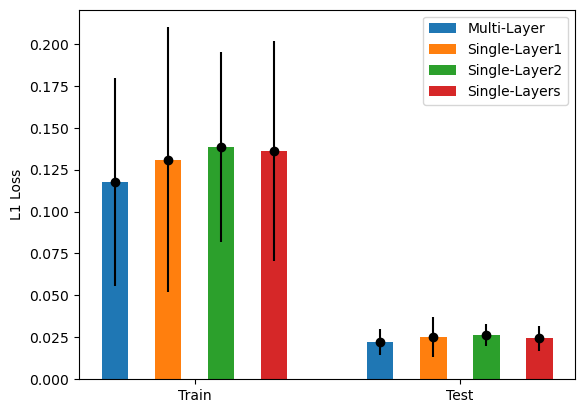

In [24]:
plt.bar([0,1], [np.average(multi_trainL),np.average(multi_testL)], width=0.1, label='Multi-Layer')

plt.errorbar([0,1], [np.average(multi_trainL),np.average(multi_testL)],
             [ np.std(multi_trainL) ,np.std(multi_testL)], fmt="o", color='black')

plt.bar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)], width=0.1, label='Single-Layer1')

plt.errorbar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)],
             [ np.std(l1_trainL) ,np.std(l1_testL)], fmt="o", color='black')

plt.bar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)], width=0.1, label='Single-Layer2')

plt.errorbar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)],
             [ np.std(l2_trainL) ,np.std(l2_testL)], fmt="o", color='black')

plt.bar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)], width=0.1, label='Single-Layers')

plt.errorbar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)],
             [ np.std(lboth_trainL) ,np.std(lboth_testL)], fmt="o", color='black')

plt.legend()
plt.xticks([0.3,1.3],['Train','Test'])
plt.ylabel('L1 Loss')
plt.show()

In [ ]:
lossL1(5, np.ones(430), ops, Ws_, x_test, y_test, criterion = torch.nn.L1Loss())

In [ ]:
multi_trainL = []
l2_trainL = []
multi_testL = []
l2_testL = []
lboth_trainL = []
l1_trainL = []
lboth_testL = []
l1_testL = []
lbds = []
bsline = []
for start_point in range(0,450,40):
    print("start time stamp:", start_point)
    train_l_multi, test_l_multi, lambda_multi = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'multi', 
                                                               start_pos=start_point, T_train=30, T_test=5)
    train_l_l2, test_l_l2, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l2', 
                                                         start_pos=start_point, T_train=30, T_test=5)
    train_l_lboth, test_l_lboth, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'lboth', 
                                                               start_pos=start_point, T_train=30, T_test=5)
    train_l_l1, test_l_l1, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l1', 
                                                         start_pos=start_point, T_train=30, T_test=5)
    
    multi_trainL.append(train_l_multi)
    l2_trainL.append(train_l_l2)
    multi_testL.append(test_l_multi)
    l2_testL.append(test_l_l2)
    lboth_trainL.append(train_l_lboth)
    l1_trainL.append(train_l_l1)
    lboth_testL.append(test_l_lboth)
    l1_testL.append(test_l_l1)
    lbds.append(lambda_multi)
    print(start_point, "train loss, multiFJ:", train_l_multi[-1], "L2 only:", train_l_l2[-1], 
              "\n \t L1 only:", train_l_l1[-1], "lboth:", train_l_lboth[-1],
              "\n test loss, multiFJ:", np.average(test_l_multi), "L2 only:",
              np.average(test_l_l2), "\n \t L1 only:", np.average(test_l_l1), "lboth:", np.average(test_l_lboth))
#               "baseline:", np.average(baseline))
    print("lambda distribution")
    plt.hist(np.ravel(np.array(lambda_multi)))
    plt.show()

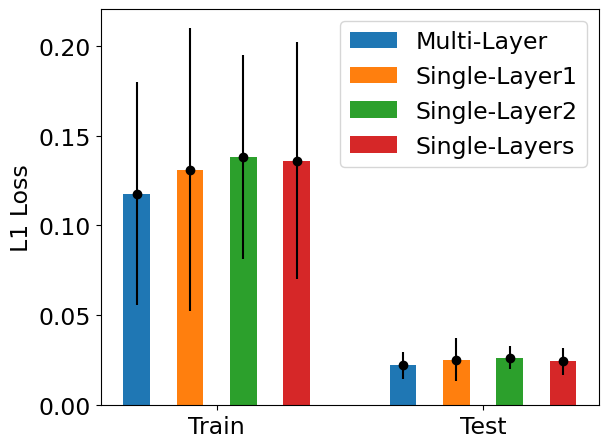

In [30]:
plt.bar([0,1], [np.average(multi_trainL),np.average(multi_testL)], width=0.1, label='Multi-Layer')

plt.errorbar([0,1], [np.average(multi_trainL),np.average(multi_testL)],
             [ np.std(multi_trainL) ,np.std(multi_testL)], fmt="o", color='black')

plt.bar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)], width=0.1, label='Single-Layer1')

plt.errorbar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)],
             [ np.std(l1_trainL) ,np.std(l1_testL)], fmt="o", color='black')

plt.bar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)], width=0.1, label='Single-Layer2')

plt.errorbar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)],
             [ np.std(l2_trainL) ,np.std(l2_testL)], fmt="o", color='black')

plt.bar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)], width=0.1, label='Single-Layers')

plt.errorbar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)],
             [ np.std(lboth_trainL) ,np.std(lboth_testL)], fmt="o", color='black')

plt.legend()
plt.xticks([0.3,1.3],['Train','Test'])
plt.ylabel('L1 Loss')
plt.tight_layout()
plt.savefig('fit_vax.png')
plt.show()

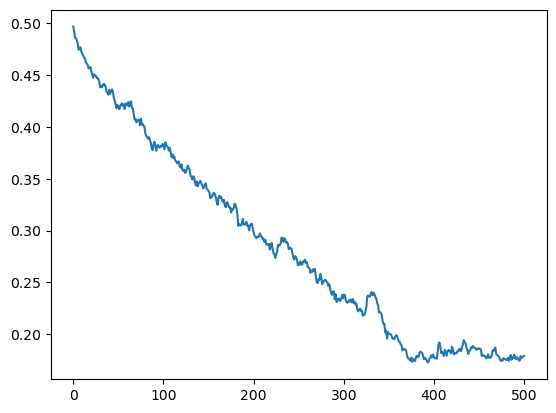

In [19]:
plt.plot(np.average(ops_all, axis=0))